# Faktafrågor

### 1. Vad menas med curse of dimensionality

Curse of dimensionality innebär att när ett dataset har väldigt många features blir datan gles, vilket gör att modeller behöver mycket mer data och lätt riskerar att överanpassning.

### 2. Vad är dimensionsreducering och varför görs det?

Dimensionsreducering är processen där man minskar antalet features (dimensioner) i ett dataset, samtidigt som man försöker bevara så mycket som möjligt av den viktiga informationen. Detta minskar beräkningstiden, minskar risken för överanpassning(curse of dimenstionality) och ibland underlättar för visualiseringar, då vi bara kan visualisera 3 eller mindre dimmensioner.

Det finns en trade-off mellan accuracy och tid vilket man måste ta hänsyn till när man dimensionrecurerar. 
Om vi reducerar från 200 till 150 dimensioner kanske träningen tar 16 timmar och vi får 95% accuracy. Om vi reducerar till 100 dimensioner tar träningen bara 8 timmar men accuracy sjunker till 85%. Man måste därför balansera tid och prestanda.

### 3. Förklara översiktligt hur PCA fungerar. 
PCA (Principal Component Analysis) är en metod för dimensionsreducering.
Den dentifierar de riktningar i datan där variansen är som störst. Rotera koordinatsystemet så att dessa riktningar blir de nya axlarna.
Sedan välja ut de första komponenterna (de som fångar mest varians) och projicera datan på dessa.

På så sätt reduceras antalet dimensioner, men man behåller så mycket som möjligt av variationen (informationen) i datasetet

### 4. Hur kan kernel PCA utvärderas?
Kernel PCA är en unsupervised metod, vilket innebär att man inte direkt får ett “resultat” som visar hur bra den är. Därför är det svårt att utvärdera den.

Man kan istället använda Kernel PCA som ett steg i en pipeline och sedan använda GridSearchCV för att välja kernel och hyperparametrar. På så sätt kan man utvärdera Kernel PCA genom prestandan på den efterföljande modellen och hitta de parametrar som ger bäst resultat.

# Koduppgifter

### 8.


In [59]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler

In [60]:
X = np.random.rand(1000, 3)
print(X[0:2])


pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
print(X2D[0:2])

X3D_inv = pca.inverse_transform(X2D)
print(np.allclose(X3D_inv, X))
print(X3D_inv[0:2])

[[0.81794096 0.54649633 0.87283846]
 [0.08531544 0.54231981 0.17282052]]
[[ 0.46945673 -0.07615303]
 [-0.52182478  0.13348513]]
False
[[0.85149461 0.54451321 0.83674857]
 [0.10935594 0.54089894 0.14696285]]


### 9.

In [61]:
df_cars = pd.read_csv("car_price_dataset.csv", sep=(";"))

In [64]:
df_cars.dropna(how="any", inplace=True)

X_cars = df_cars.drop(columns=["Price"])
y_cars = df_cars["Price"]


X_cars = pd.get_dummies(X_cars, drop_first=True)
scaler = StandardScaler()

X_cars_scaled = scaler.fit_transform(X_cars)

print(X_cars[0:2])

   Year  Engine_Size  Mileage  Doors  Owner_Count  Brand_BMW  Brand_Chevrolet  \
0  2020          4.2   289944      3            5      False            False   
1  2012          2.0     5356      2            3      False             True   

   Brand_Ford  Brand_Honda  Brand_Hyundai  ...  Model_Sonata  Model_Sportage  \
0       False        False          False  ...         False           False   
1       False        False          False  ...         False           False   

   Model_Tiguan  Model_Tucson  Model_X5  Fuel_Type_Electric  Fuel_Type_Hybrid  \
0         False         False     False               False             False   
1         False         False     False               False              True   

   Fuel_Type_Petrol  Transmission_Manual  Transmission_Semi-Automatic  
0             False                 True                        False  
1             False                False                        False  

[2 rows x 48 columns]


In [113]:
pca = PCA(n_components=48)
X2D_cars = pca.fit_transform(X_cars)
X2D_cars_scaled = pca.fit_transform(X_cars_scaled)


In [114]:
#X_train, X_test, y_train, y_test = train_test_split(X2D_cars, y_cars, test_size=0.2, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X2D_cars_scaled, y_cars, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [115]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)


y_pred_lin = lin_reg.predict(X_val)

print("Varians:", pca.explained_variance_ratio_.sum())
print("\nAntal komponenter efter PCA:", pca.n_components_)
print("LinearRegression RMSE: ", root_mean_squared_error(y_val, y_pred_lin))

Varians: 1.0

Antal komponenter efter PCA: 48
LinearRegression RMSE:  66.503890154683


# Kapitel 6
### Faktafrågor

### 1 Vad är klustring för något? Ge några exempel på tillämpningsområden.

Klustring är när man delar in olika grupper/kluster av datapunkter efter hur dem förliknar varandra. En vnalig klustringsmodell heter K-means.

Ett tillämpningsområde skulle kunna vara inom marknadsföring. Dela upp personer i ålder och inkomst så företag kan rikta reklam till vissa grupper.

### 2. Förklara översiktligt hur K-means fungerar.
K-means är en av de vanligaste algoritmerna för klustring. Algoritmen fungerar genom att man i förväg bestämmer hur många kluster (k) man vill ha. Sedan upprepas följande steg:

Initiering: Placera ut k slumpmässiga klustercentra (centroider).

Tilldelning: Varje datapunkt tilldelas det kluster vars centroid den ligger närmast.

Uppdatering: För varje kluster beräknas en ny centroid som är medelvärdet av punkterna i klustret.

Upprepa steg 2–3 tills klustren stabiliseras (eller tills ett max antal iterationer är nått).

Resultatet blir att datapunkterna delas upp i k grupper där varje grupp representeras av sitt centroid.

   median_income  latitude  longitude
0         8.3252     37.88    -122.23
1         8.3014     37.86    -122.22
2         7.2574     37.85    -122.24
3         5.6431     37.85    -122.25
4         3.8462     37.85    -122.25
   median_income  latitude  longitude Cluster
0         8.3252     37.88    -122.23       0
1         8.3014     37.86    -122.22       0
2         7.2574     37.85    -122.24       0
3         5.6431     37.85    -122.25       0
4         3.8462     37.85    -122.25       2


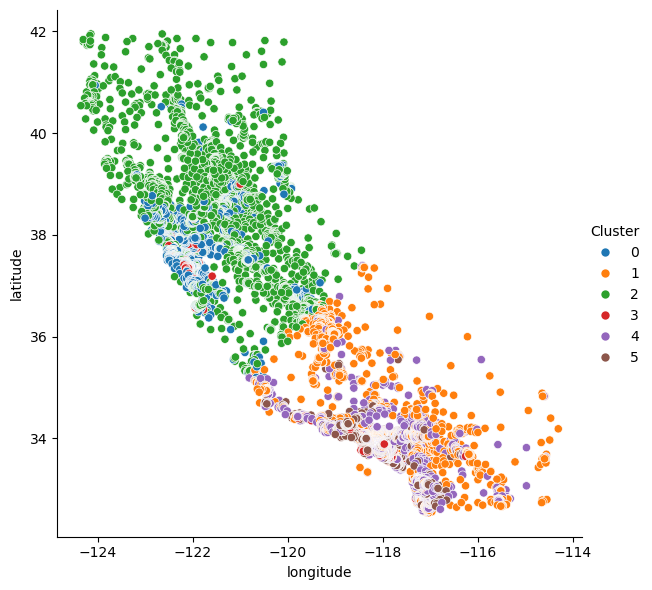

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

df = pd.read_csv("housing.csv")
X = df.loc[:, ["median_income", "latitude", "longitude"]]
print(X.head())

kmeans = KMeans(n_clusters=6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")
print(X.head())

sns.relplot(
    x="longitude", y="latitude", hue="Cluster", data=X, height=6,
)